# Welche Games haben den RPG-Tag?

In [1]:
# Import
import os
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to the data
data_path = '/home/jm/Desktop/Gamestar_Data/API/'

# Path for the first datafile
data_file= sorted([os.path.join(data_path, file) for file in os.listdir(data_path)])[0]

In [3]:
df_data = pd.read_json(data_file).T
print('Games in df:\t\t{}'.format(df_data.shape[0]))

rpg_games = [appid for appid, tags in df_data[['appid', 'tags']].values if tags and 'RPG' in tags.keys()]
df_rpg = df_data.loc[rpg_games]
print('RPG-Games in df:\t{}'.format(df_rpg.shape[0]))

Games in df:		15495
RPG-Games in df:	2632


# Sammeln der appids für alle Games, bei denen das RPG-Tag in den Top-n Tags vorkommt

In [4]:
def getTagAppids(n, game_tag='RPG'):
    rpg_appids = []
    for appid, name, tags in df_data[['appid', 'name', 'tags']].values:
        if tags and game_tag in tags.keys():
            most_n_tags = [tag for tag, value in sorted(tags.items(), key=operator.itemgetter(1), reverse=True)][:n]
            if game_tag in most_n_tags:
                rpg_appids.append(appid)
    return rpg_appids
            
n = 5
rpg_appids = getTagAppids(n)
print('For the Top-{}-Tags there are {} games.'.format(n, len(rpg_appids)))

For the Top-5-Tags there are 2066 games.


# Wie viele Games gibt es mit dem RPG-Tag in den Top-n für verschiedene n?

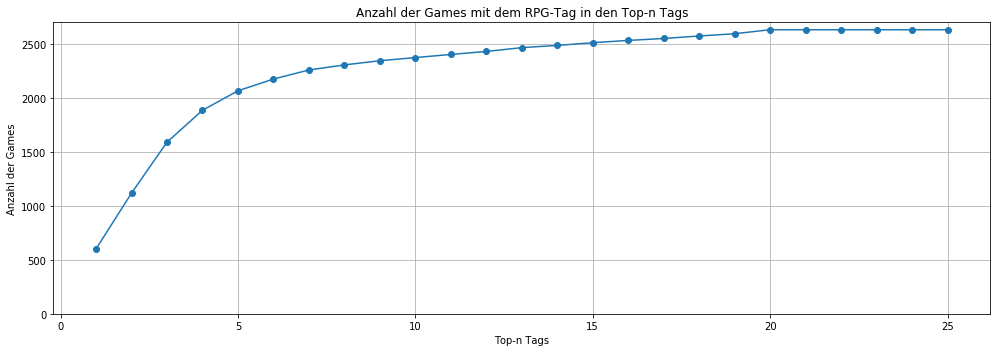

In [5]:
tags_in_top_n = [len(getTagAppids(n)) for n in range(1,26)]

plt.figure(figsize=(14,5))
plt.plot(range(1,26), tags_in_top_n, marker='o')
plt.grid()
plt.ylim([0, 2700])
plt.title('Anzahl der Games mit dem RPG-Tag in den Top-n Tags')
plt.xlabel('Top-n Tags')
plt.ylabel('Anzahl der Games')
plt.tight_layout()
plt.savefig('Grafiken/02_Anzahl_der_Games_mit_dem_RPG_Tag.pdf')
plt.show()

Nur die Games mit dem RPG-Tag als eines der zwei wichtigsten Tags werden für die weiteren Analysen betrachtet.

# Speichern der appids für die RPG-Games

In [6]:
n = 2
top_n_appids = getTagAppids(n)
pd.DataFrame(top_n_appids).to_csv('rpg_top_2_appids.csv', index=False)